In [3]:
from importlib import reload
import sys
import os
sys.path.insert(0, './../scripts')

In [4]:
import pickle
import numpy as np
from scipy.interpolate import interp1d,RegularGridInterpolator
from scipy.optimize import least_squares
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.figure import figaspect
import time

import base_network as base_network
import ring_network as ring_network
import spat_ori_network as network
import sim_util as su
import ricciardi as ric
import integrate as integ

def imshowbar(fig,ax,A,**kwargs):
    imsh = ax.imshow(A,**kwargs)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(imsh, cax=cax, orientation='vertical')
    return cbar

In [85]:
for i in range(0,76,5):
    with open('./../results/dmft_grad_descent_id_None_n_{:d}'.format(i)+'.pkl','rb') as\
            handle:
        res_dict = pickle.load(handle)
        
    print(res_dict['init_loss'])
    # print(res_dict['grad'])
    # print(res_dict['init_prm_vec'])
    # print(res_dict['final_prm_vec'])
    print()
    print(res_dict['prms'])
    print({'bX': res_dict['best_monk_bX'], 'aXs': res_dict['best_monk_aXs'], 'eX': res_dict['best_monk_eX']})
    print()

27.01900274080696

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.00017004168435080777, 'beta': 0.12612405972820806, 'gE': 5.928643474754459, 'gI': 2.6440713727005996, 'hE': 4.966452273949772, 'hI': 0.10172871798910774, 'L': 5.482675876659675, 'CVL': 3.2538001583918414}
{'bX': 4.638187096827093, 'aXs': array([0.        , 3.31206289, 4.46947863, 5.41223449, 5.8735375 ,
       6.1303346 ]), 'eX': 0.033011072493359495}

18.122959937260728

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.0001443987679170869, 'beta': 0.13510072738583362, 'gE': 5.913491110698617, 'gI': 2.6709642910872096, 'hE': 4.974669394711298, 'hI': 0.05835791817611537, 'L': 5.482675876659675, 'CVL': 3.2538001583918414}
{'bX': 4.637086764176771, 'aXs': array([0.        , 3.31551637, 4.47413894, 5.41787781, 5.87966182,
       6.13672668]), 'eX': 0.004502146697036665}

15.707664097513822

{'K': 500, 'SoriE': 43.6

In [86]:
for i in range(0,62,5):
    with open('./../results/dmft_grad_descent_id_best_fit_lower_opto_n_{:d}'.format(i)+'.pkl','rb') as\
            handle:
        res_dict = pickle.load(handle)
        
    print(res_dict['init_loss'])
    # print(res_dict['grad'])
    # print(res_dict['init_prm_vec'])
    # print(res_dict['final_prm_vec'])
    print()
    print(res_dict['prms'])
    print({'bX': res_dict['best_monk_bX'], 'aXs': res_dict['best_monk_aXs'], 'eX': res_dict['best_monk_eX']})
    print()

27.332682704441833

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.00017435474107809005, 'beta': 0.13250822508677895, 'gE': 5.926270667535185, 'gI': 2.6439428715140654, 'hE': 4.97037573194526, 'hI': 0.0971634399453816, 'L': 4.111426895213764, 'CVL': 2.440005899275125}
{'bX': 4.640355982763935, 'aXs': array([0.        , 3.31300153, 4.47074528, 5.41376832, 5.87520206,
       6.13207194]), 'eX': 0.032056122033586265}

17.69796775723661

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.00014777953331883854, 'beta': 0.138258750885961, 'gE': 5.912369827010819, 'gI': 2.6662740776971527, 'hE': 4.979732581298055, 'hI': 0.05889443481645096, 'L': 4.111426895213764, 'CVL': 2.440005899275125}
{'bX': 4.639804021741934, 'aXs': array([0.        , 3.31620733, 4.47507137, 5.41900691, 5.88088716,
       6.1380056 ]), 'eX': 0.002477501672763066}

16.963769701592998

{'K': 500, 'SoriE': 43.648743

In [87]:
for i in range(0,62,5):
    with open('./../results/dmft_grad_descent_id_best_fit_even_lower_opto_n_{:d}'.format(i)+'.pkl','rb') as\
            handle:
        res_dict = pickle.load(handle)
        
    print(res_dict['init_loss'])
    # print(res_dict['grad'])
    # print(res_dict['init_prm_vec'])
    # print(res_dict['final_prm_vec'])
    print()
    print(res_dict['prms'])
    print({'bX': res_dict['best_monk_bX'], 'aXs': res_dict['best_monk_aXs'], 'eX': res_dict['best_monk_eX']})
    print()

31.08603454301925

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.00018526457260562677, 'beta': 0.13609490180942788, 'gE': 5.924244965814803, 'gI': 2.6473368346646797, 'hE': 4.973537575300806, 'hI': 0.09041479586343122, 'L': 3.0831352444397173, 'CVL': 2.440005899275125}
{'bX': 4.6416700918516, 'aXs': array([0.        , 3.31364099, 4.4716082 , 5.41481325, 5.87633606,
       6.13325552]), 'eX': 0.038089540270654754}

21.44144935217345

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.00015445948238299232, 'beta': 0.13440358594628596, 'gE': 5.912120841495464, 'gI': 2.668560782182227, 'hE': 4.981831214237192, 'hI': 0.05366833619806579, 'L': 3.0831352444397173, 'CVL': 2.440005899275125}
{'bX': 4.640761985651885, 'aXs': array([0.        , 3.31637072, 4.47529185, 5.4192739 , 5.8811769 ,
       6.138308  ]), 'eX': 0.0}

20.317221050455107

{'K': 500, 'SoriE': 43.64874397050553, 'Sori

In [89]:
for i in range(0,60,5):
    with open('./../results/dmft_grad_descent_id_best_fit_much_lower_opto_n_{:d}'.format(i)+'.pkl','rb') as\
            handle:
        res_dict = pickle.load(handle)
        
    print(res_dict['init_loss'])
    # print(res_dict['grad'])
    # print(res_dict['init_prm_vec'])
    # print(res_dict['final_prm_vec'])
    print()
    print(res_dict['prms'])
    print({'bX': res_dict['best_monk_bX'], 'aXs': res_dict['best_monk_aXs'], 'eX': res_dict['best_monk_eX']})
    print()

41.36233103166873

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.00024194597175324984, 'beta': 0.15047449879764022, 'gE': 5.91882885640347, 'gI': 2.6710885852044206, 'hE': 4.979123551563018, 'hI': 0.07591655566144602, 'L': 1.7337743442704976, 'CVL': 2.440005899275125}
{'bX': 4.6440427119323076, 'aXs': array([0.        , 3.31461651, 4.47292462, 5.41640735, 5.87806603,
       6.13506112]), 'eX': 0.04931725818836924}

32.23675693524184

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.0001545016597040923, 'beta': 0.1467892435641709, 'gE': 5.933095761642338, 'gI': 2.6518780332992375, 'hE': 4.951786897346899, 'hI': 0.0838117080738221, 'L': 1.7337743442704976, 'CVL': 2.440005899275125}
{'bX': 4.628821679941778, 'aXs': array([0.        , 3.30829009, 4.46438742, 5.40606937, 5.86684691,
       6.12335149]), 'eX': 0.0007086554586442026}

31.802581650758395

{'K': 500, 'SoriE': 43.6487

In [90]:
for i in range(0,52,5):
    with open('./../results/dmft_grad_descent_id_best_fit_higher_opto_n_{:d}'.format(i)+'.pkl','rb') as\
            handle:
        res_dict = pickle.load(handle)
        
    print(res_dict['init_loss'])
    # print(res_dict['grad'])
    # print(res_dict['init_prm_vec'])
    # print(res_dict['final_prm_vec'])
    print()
    print(res_dict['prms'])
    print({'bX': res_dict['best_monk_bX'], 'aXs': res_dict['best_monk_aXs'], 'eX': res_dict['best_monk_eX']})
    print()

28.08159014266309

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.0001676481275629981, 'beta': 0.12705538751098738, 'gE': 5.9315698290419325, 'gI': 2.6376725749544985, 'hE': 4.963404409743333, 'hI': 0.10424291277422155, 'L': 7.311265775269714, 'CVL': 1.8297463086242787}
{'bX': 4.637496777586379, 'aXs': array([0.        , 3.31159839, 4.46885181, 5.41147545, 5.87271377,
       6.12947485]), 'eX': 0.028039156608735072}

19.957122967042785

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.00014353065787826942, 'beta': 0.13845718523927616, 'gE': 5.922511451846107, 'gI': 2.65892258620857, 'hE': 4.973052444275368, 'hI': 0.0742512052990168, 'L': 7.311265775269714, 'CVL': 1.8297463086242787}
{'bX': 4.637358119795332, 'aXs': array([0.        , 3.31477983, 4.47314502, 5.41667423, 5.87835566,
       6.13536341]), 'eX': 0.006791312380800059}

17.87268367713088

{'K': 500, 'SoriE': 43.6487

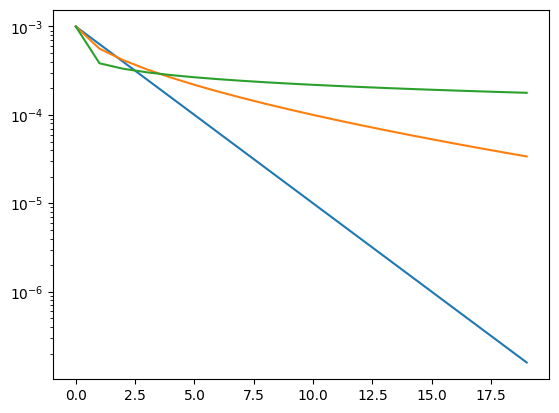

In [63]:
plt.plot(1e-3*10**(-(np.arange(20)/5)**1))
plt.plot(1e-3*10**(-(np.arange(20)/10)**0.6))
plt.plot(1e-3*10**(-(np.arange(20)/80)**0.2))
plt.yscale('log')

In [5]:
with open('./../results/best_fit'+'.pkl','rb') as\
        handle:
    res_dict = pickle.load(handle)
    
print(res_dict['prms'])
print(res_dict['best_monk_bX'])
print(res_dict['best_monk_aXs'])
print(res_dict['best_monk_eX'])

{'K': 500, 'SoriE': 43.64874397050553, 'SoriI': 19.762766061548188, 'SoriF': 18.319783509742784, 'J': 0.0001563477555477658, 'beta': 0.11430243102629813, 'gE': 5.950020178827337, 'gI': 2.6064265565889126, 'hE': 4.944829366729805, 'hI': 0.14751926973057156, 'L': 5.482675876659675, 'CVL': 3.2538001583918414, 'Nori': 20, 'NE': 400, 'NI': 100}
4.632583485344727
[0.         3.30629524 4.46169544 5.40280958 5.86330927 6.11965919]
0.04999999592402077


In [26]:
tuple(map(int, '(0,1,2,3)'.replace('(','').replace(')','').split(',')))

(0, 1, 2, 3)